# Out Liars handling

In [5]:
# import all the tools We need

# Regular EDA and plotting libraries
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
import pickle

# Load DataFrame
with open("../data/alter/df1_Cleaned.pkl", "rb") as f:
    df1 = pickle.load(f)

In [3]:
import os

In [4]:
df_Pre=df1.copy()
def winsorize_iqr(data):
    df_winsor = df1.copy()
    numeric_cols = df_winsor.select_dtypes(include=["int64", "float64"]).columns
    
    for col in numeric_cols:
        Q1 = df_winsor[col].quantile(0.25)
        Q3 = df_winsor[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df1[(df1[col] < lower) | (df1[col] > upper)]
        # Replace outliers with whisker values
        df_winsor[col] = df_winsor[col].apply(lambda x: lower if x < lower else upper if x > upper else x)
    
    return df_winsor

# Apply winsorization
df_winsorized = winsorize_iqr(df_Pre)
print(df_winsorized.describe())

                  ID      year    loan_amount  rate_of_interest  \
count  148470.000000  148470.0  148470.000000     148470.000000   
mean    99225.132566    2019.0  327887.620395          4.022851   
std     42918.274684       0.0  168933.023443          0.453433   
min     24890.000000    2019.0   16500.000000          3.000000   
25%     62058.250000    2019.0  196500.000000          3.750000   
50%     99220.500000    2019.0  296500.000000          3.990000   
75%    136394.750000    2019.0  436500.000000          4.250000   
max    173559.000000    2019.0  796500.000000          5.000000   

       Interest_rate_spread  Upfront_charges      term  property_value  \
count         148470.000000    148470.000000  148470.0    1.484700e+05   
mean               0.422463      2877.923296     360.0    4.673674e+05   
std                0.413540      2203.341578       0.0    2.421125e+05   
min               -0.479063         0.000000     360.0    8.000000e+03   
25%                0.18090

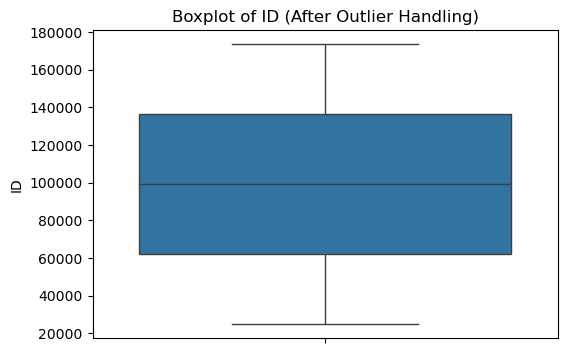

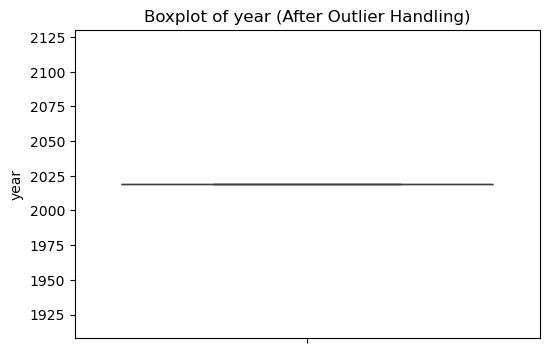

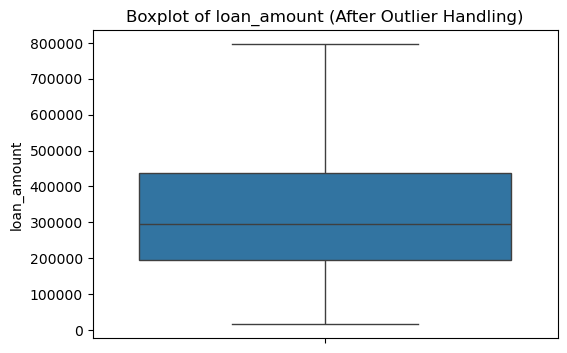

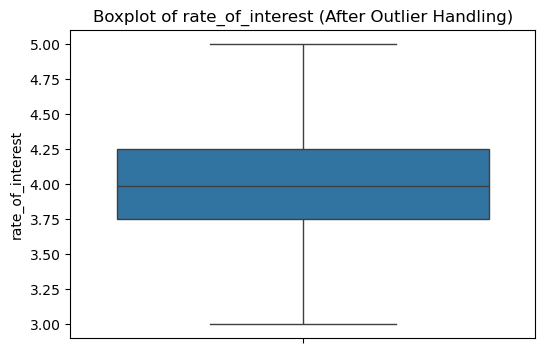

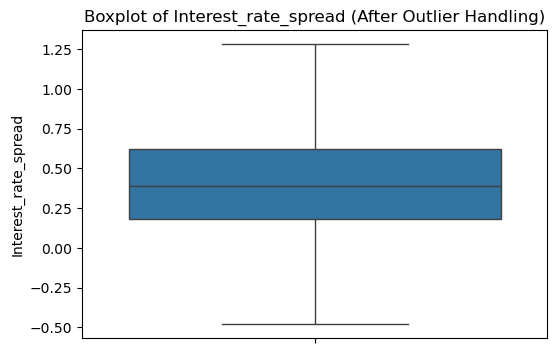

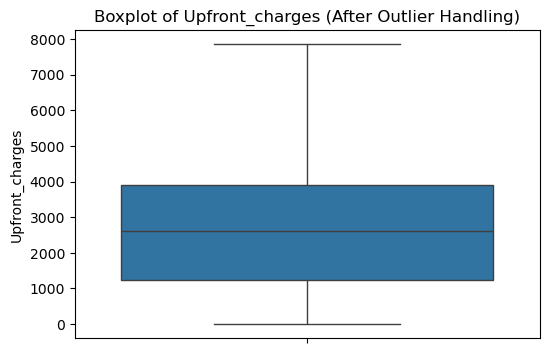

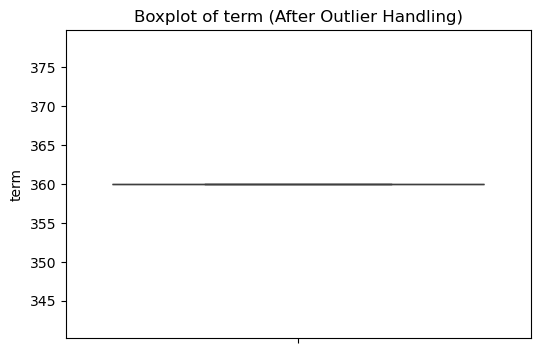

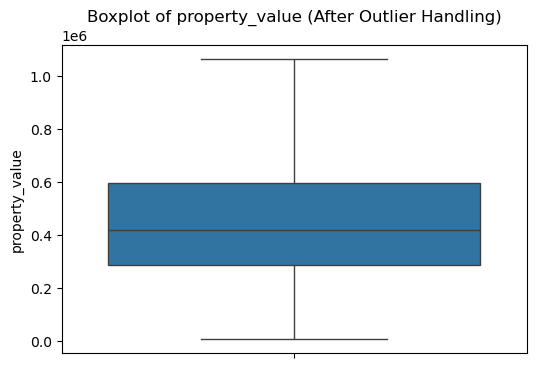

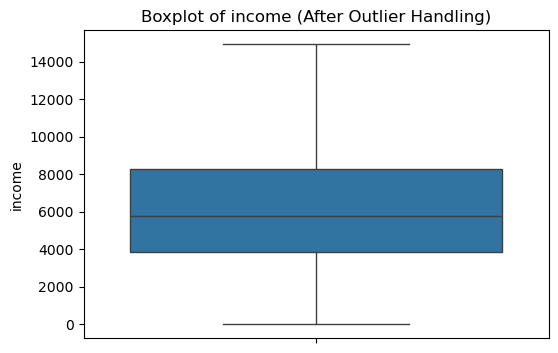

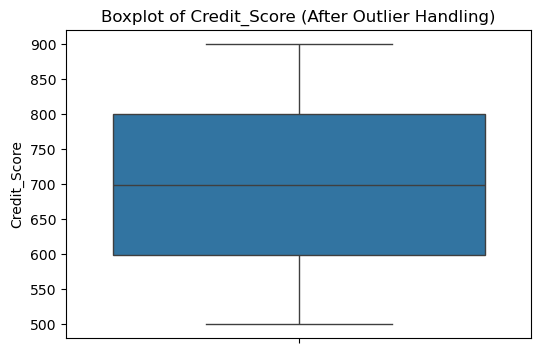

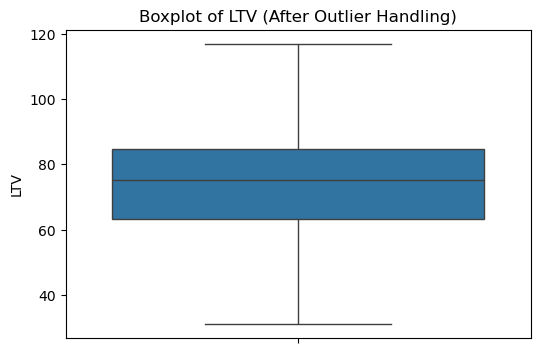

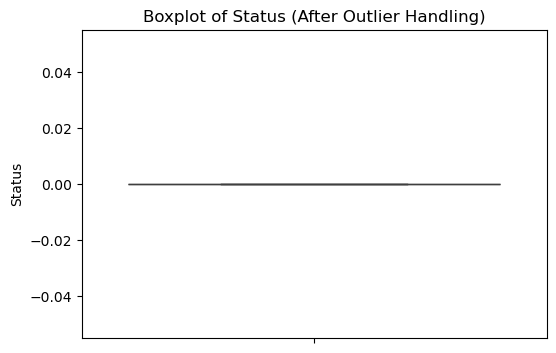

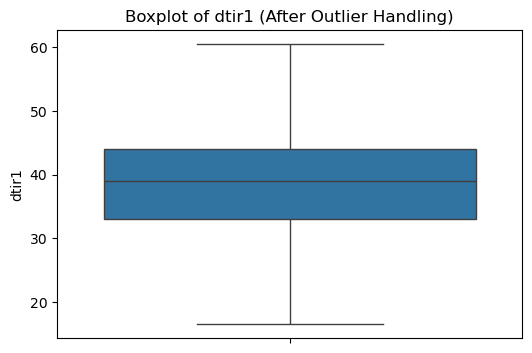

In [8]:


df_cleaned = df_winsorized     # if you winsorized outliers


# Select numeric columns
numeric_cols = df_cleaned.select_dtypes(include=["int64", "float64"]).columns

# Loop through each column and save boxplot
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Boxplot of {col} (After Outlier Handling)')
    plt.show()


In [11]:
import pickle

# Save DataFrame
with open("../data/alter/df1_Cleaned_after_outliars.pkl", "wb") as f:
    pickle.dump(df_cleaned, f)

In [14]:
df_cleaned['Status'].value_counts()

Status
0.0    148470
Name: count, dtype: int64